<a href="https://colab.research.google.com/github/TifannyA/Mineria_Python/blob/main/EDA02GM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Llamado de librerías


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Lectura de datos


In [4]:
url='https://raw.githubusercontent.com/utn-frocha/datos/main/encuesta_aeropuerto.csv'
df = pd.read_csv(url)

Explorar la estructura del juego de datos


In [ ]:
#df.dtypes
#df.head(2)
#df.info()
#df.describe
#df.isnull().sum()
print(df.isnull().sum(axis=0))

In [ ]:
grupo = df.iloc[1:,1:10]
print(grupo.head(5))

In [ ]:
agrupacion=pd.DataFrame(df)
agrupacion.groupby(by ='Type of Travel').mean().round()

In [16]:
df['Customer Type'].unique()


array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [17]:
promedio_edad=round(df['Age'].mean())
print(f'La edada de los pasajeros es de {promedio_edad}')

La edada de los pasajeros es de 39


In [21]:
df['Gender'].unique()

array([0, 1])

In [20]:
df.replace(
    {
        'Gender':{
            'Male':0,
            'Female':1,
        }
    },inplace=True
)

In [24]:
pasajeros=pd.get_dummies(
    df,
    columns=['Customer Type'],
    drop_first=True
)

In [ ]:
display(pasajeros)

In [26]:
pasajeros['Customer Type_disloyal Customer'].unique()

array([0, 1], dtype=uint8)

# Gráficas de Valores atípicos

<AxesSubplot:xlabel='Gender', ylabel='Age'>

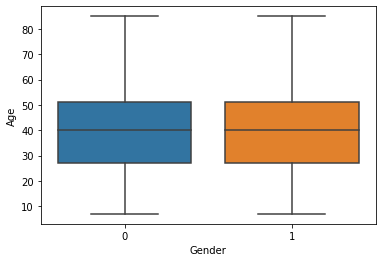

In [27]:
sns.boxplot(x='Gender',y='Age',data=df)

<AxesSubplot:>

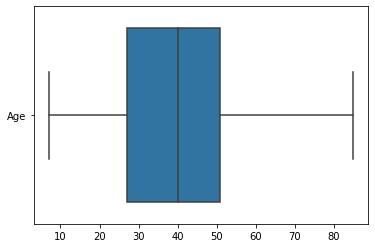

In [29]:
sns.boxplot(data=df[['Age']],orient="h")

<AxesSubplot:xlabel='Class', ylabel='Age'>

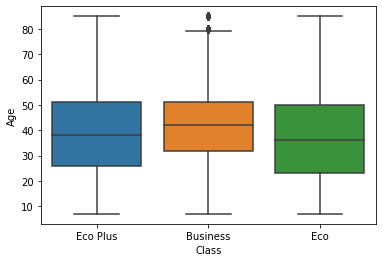

In [30]:
sns.boxplot(x='Class',y='Age',data=df)

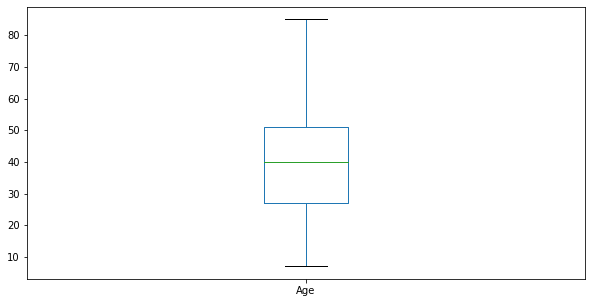

In [33]:
bloxplot=df.boxplot(column=['Age'],grid=False,fontsize=10,figsize=(10,5))

<AxesSubplot:xlabel='Type of Travel', ylabel='Age'>

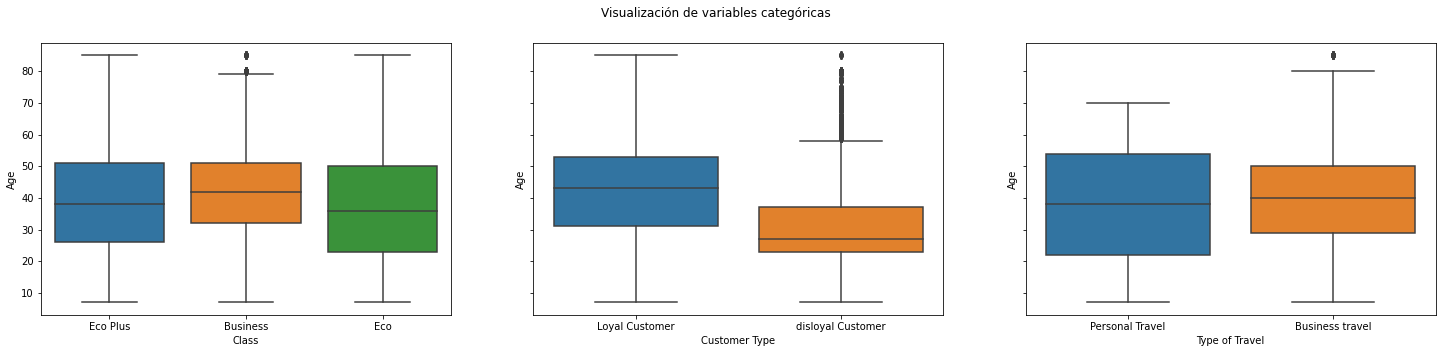

In [37]:
fig,axes=plt.subplots(1,3,figsize=(25,5),sharey=True)
fig.suptitle('Visualización de variables categóricas')
sns.boxplot(x='Class',y='Age',data=df,ax=axes[0])
sns.boxplot(x='Customer Type',y='Age',data=df,ax=axes[1])
sns.boxplot(x='Type of Travel',y='Age',data=df,ax=axes[2])


<AxesSubplot:xlabel='Gender', ylabel='Flight Distance'>

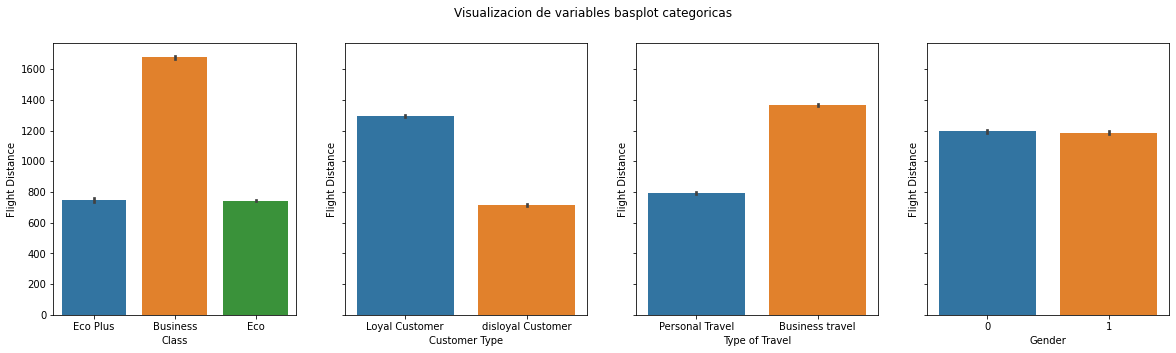

In [39]:
fig,axes =plt.subplots(1,4,figsize=(20,5),sharey=True)
fig.suptitle('Visualizacion de variables basplot categoricas')
sns.barplot(x='Class',y='Flight Distance',data=df,ax=axes[0])
sns.barplot(x='Customer Type',y='Flight Distance',data=df,ax=axes[1])
sns.barplot(x='Type of Travel',y='Flight Distance',data=df,ax=axes[2])
sns.barplot(x='Gender',y='Flight Distance',data=df,ax=axes[3])



In [40]:
datos =df.groupby('Class')['Class'].count()
display(datos)
datos=pd.DataFrame(datos)
display(datos)

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

,Class
Class,
Business,62160
Eco,58309
Eco Plus,9411


In [47]:
datos=datos.rename(columns={'Class':'Total'})
dfc=datos.reset_index()
dfc.reset_index(drop=True,inplace=True)
dfc


,Class,Total
0,Business,62160
1,Eco,58309
2,Eco Plus,9411


<function matplotlib.pyplot.show(close=None, block=None)>

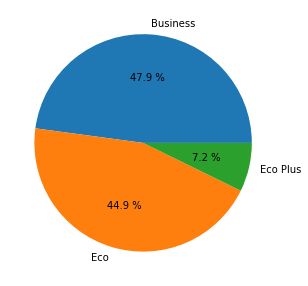

In [57]:
fig = plt.figure(figsize=(20,5))
plt.pie(dfc['Total'],labels=dfc['Class'],autopct="%0.1f %%")
plt.show


<ipython-input-60-afb45342cd52>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['satisfaction','Class','Type of Travel','Customer Type','Gender','id'],1).hist()


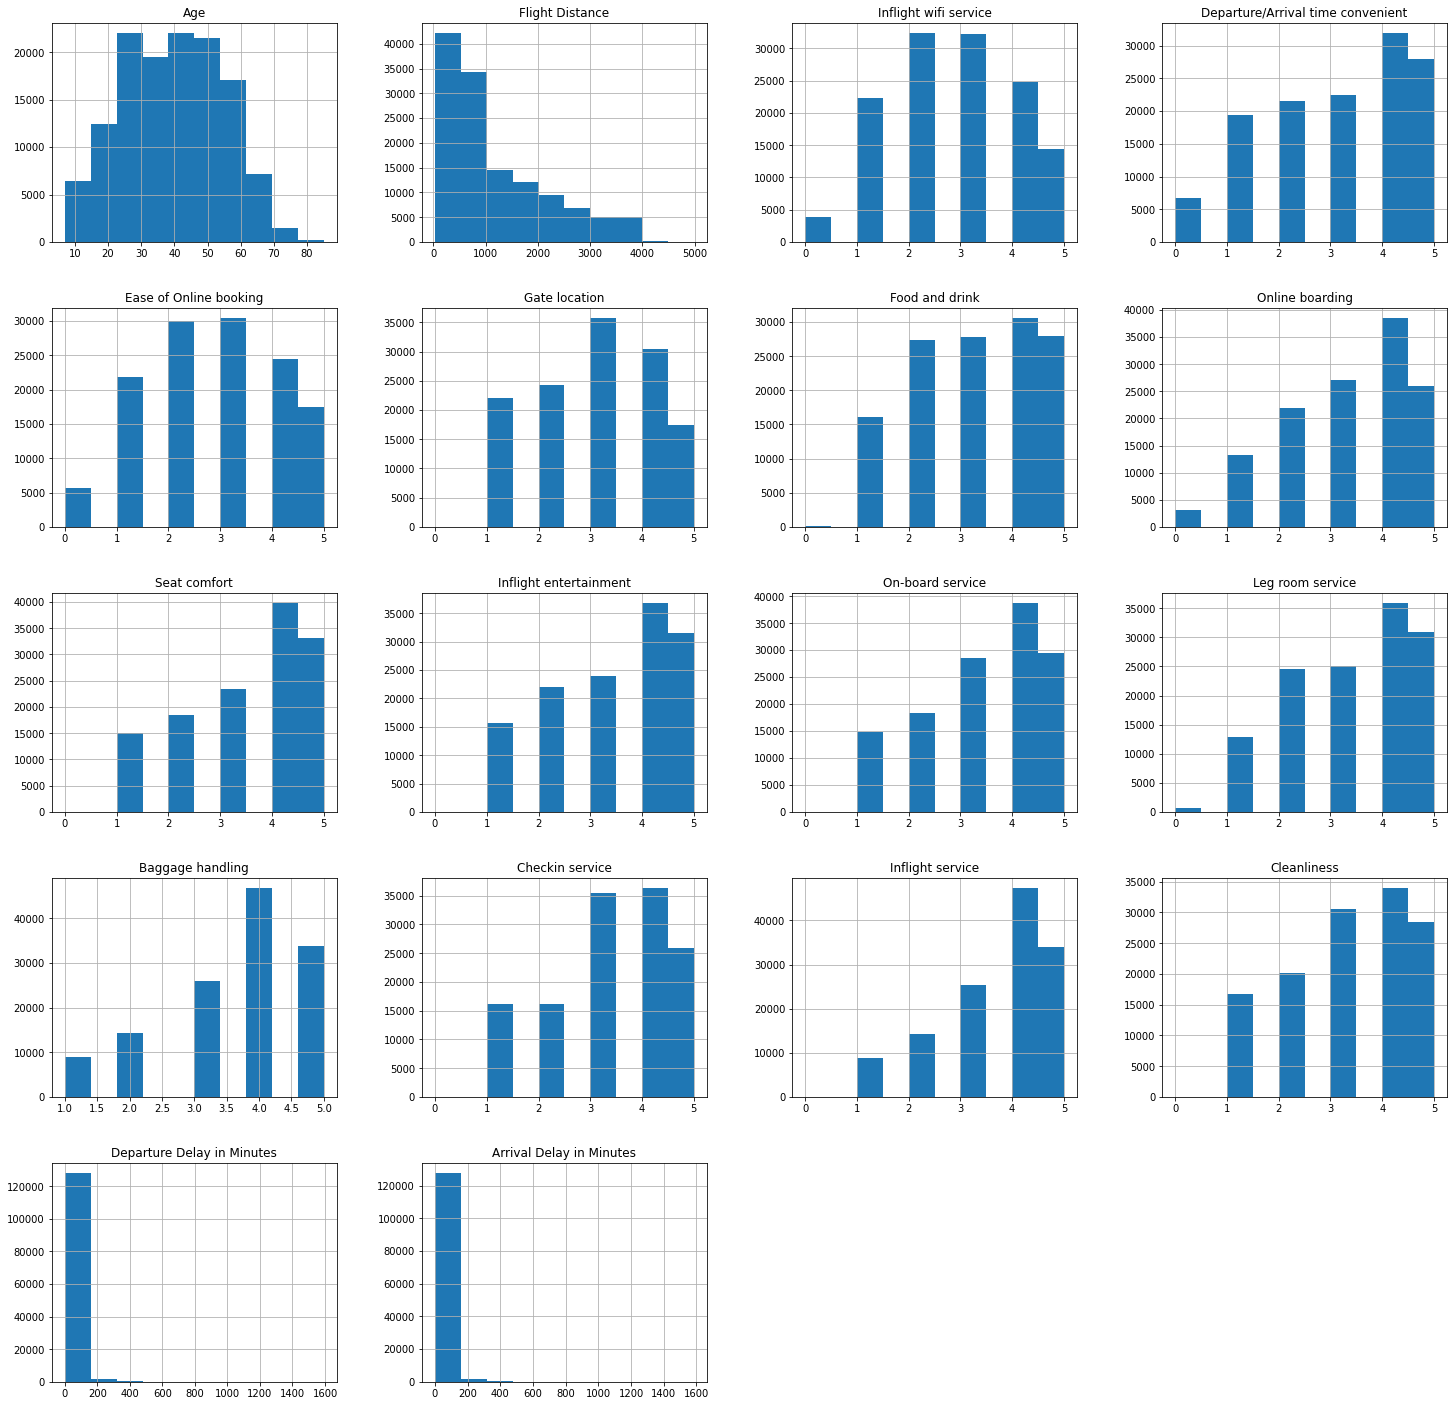

In [60]:
plt.rcParams["figure.figsize"]=(25,25)
df.drop(['satisfaction','Class','Type of Travel','Customer Type','Gender','id'],1).hist()
plt.show()

Gráfica de Correlaciones

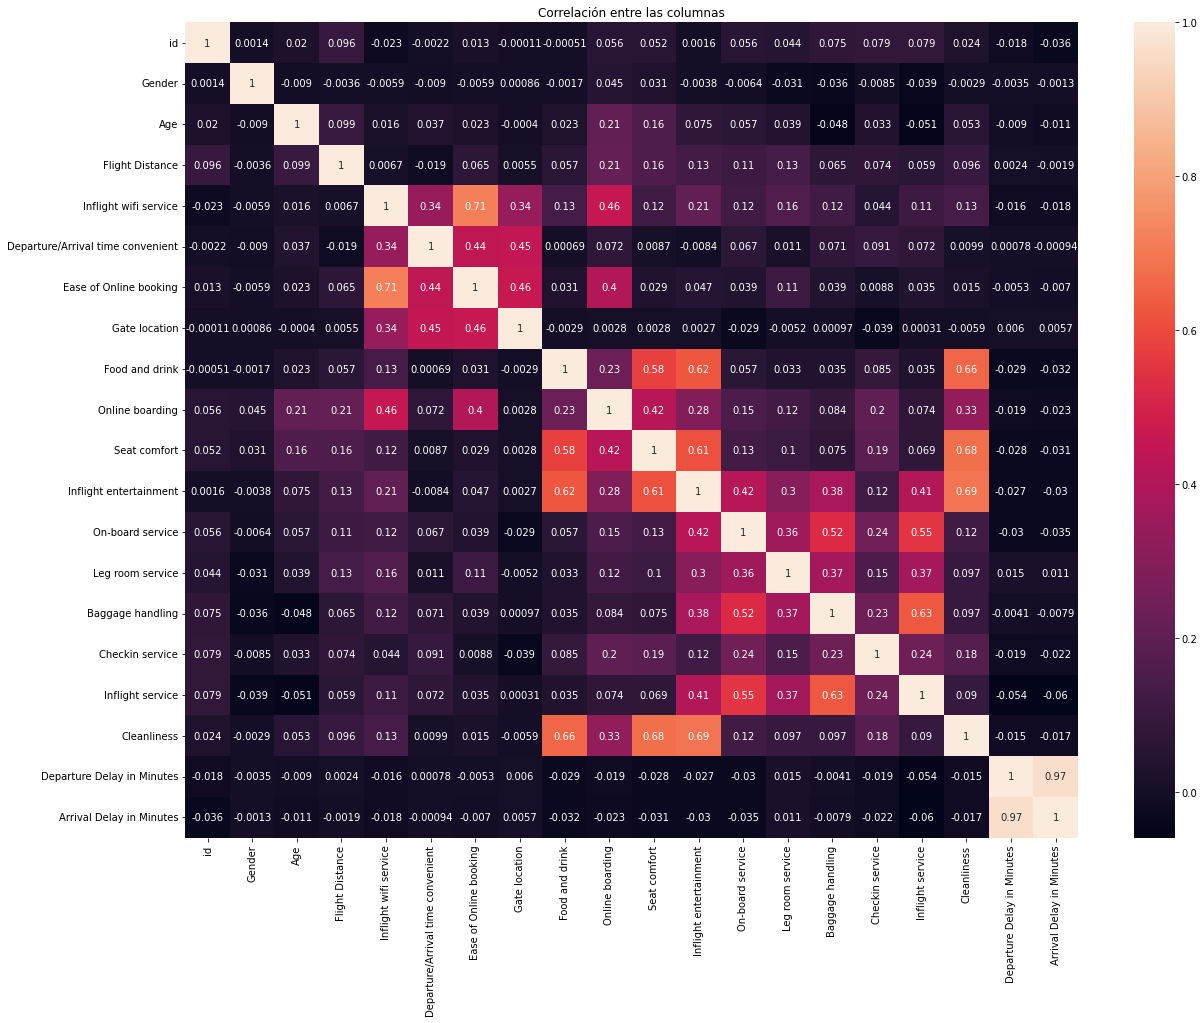

In [62]:
fig = plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot=True)
plt.title("Correlación entre las columnas")
plt.show()

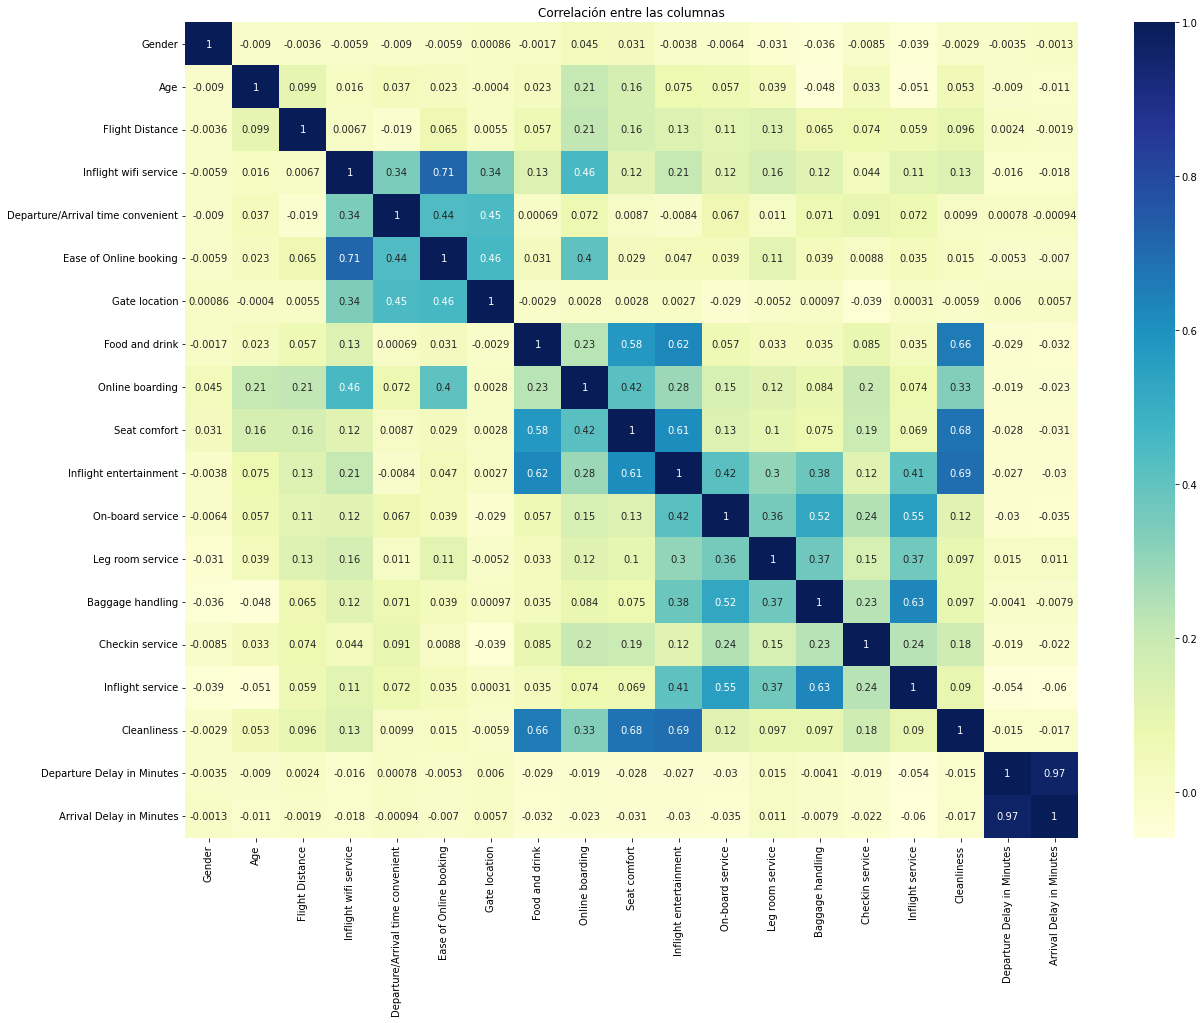

In [63]:
fig = plt.figure(figsize=(20,15))
df_cor=df.drop(['id'],axis=1)
sns.heatmap(df_cor.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlación entre las columnas")
plt.show()
#lo mismo de arriba pero modificado visualmente

Generar gráfico 3D

<ipython-input-70-80c390b07b9c>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


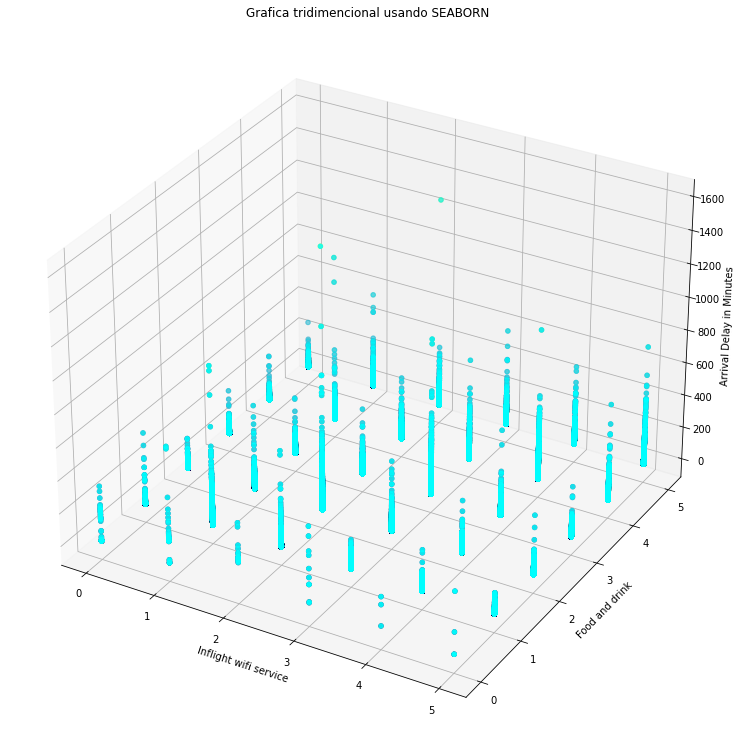

In [70]:

fig = plt.figure(figsize=(25,10))
x = df['Inflight wifi service']
y = df['Food and drink']
z = df['Arrival Delay in Minutes']
ax = Axes3D(fig) 
ax.scatter(x, y, z, c=z, marker='o')
ax.set_xlabel('Inflight wifi service')
ax.set_ylabel('Food and drink')
ax.set_zlabel('Arrival Delay in Minutes')
plt.title('Grafica tridimencional usando SEABORN')
ax.scatter(x, y, z, c="aqua")
plt.show()